In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer

I0629 15:35:28.525401 140122108950336 file_utils.py:38] PyTorch version 1.4.0 available.
I0629 15:35:30.301201 140122108950336 file_utils.py:54] TensorFlow version 2.1.0 available.


In [3]:
DATA_IN_PATH = './data_in/KOR/KorNLI/'

In [4]:
multinli_data = pd.read_csv(DATA_IN_PATH + "multinli.train.ko.tsv", sep='\t', error_bad_lines=False)
multinli_data.head(10)

b'Skipping line 24426: expected 3 fields, saw 4\nSkipping line 156343: expected 3 fields, saw 4\nSkipping line 218766: expected 3 fields, saw 4\nSkipping line 232318: expected 3 fields, saw 4\nSkipping line 253493: expected 3 fields, saw 4\n'
b'Skipping line 265734: expected 3 fields, saw 4\nSkipping line 282588: expected 3 fields, saw 4\nSkipping line 350969: expected 3 fields, saw 4\n'


,sentence1,sentence2,gold_label
0,개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.,제품과 지리학은 크림 스키밍을 작동시키는 것이다.,neutral
1,시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...,사람들이 기억하면 다음 수준으로 물건을 잃는다.,entailment
2,우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.,우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다.,entailment
3,어떻게 아세요? 이 모든 것이 다시 그들의 정보다.,이 정보는 그들의 것이다.,entailment
4,"그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...",테니스화의 가격은 다양하다.,neutral
5,내 워커가 고장나서 지금 화가 났어. 스테레오를 정말 크게 틀어야 해.,나는 내 워크맨이 고장나서 화가 나서 이제 스테레오를 정말 크게 틀어야 한다.,entailment
6,그러나 apse 위에서 살아남은 기독교 모자이크 몇 개는 아기 예수와 함께 성모인데...,기독교 모자이크의 대부분은 이슬람교도들에 의해 파괴되었다.,neutral
7,(슬레이트에 대한 읽기는 잭슨의 연구 결과를 받아들인다.),슬레이트는 잭슨의 발견에 대해 의견을 가지고 있었다.,entailment
8,게이들과 레즈비언들.,이성애자.,contradiction
9,Rue des Francs-Bourgeois의 끝에는 많은 사람들이 돌과 붉은 벽돌...,Place des Vosges는 전적으로 회색 대리석으로 만들어졌다.,contradiction


In [5]:
print('전체 multinli_data 개수: {}'.format(len(multinli_data)))

전체 multinli_data 개수: 385494


In [6]:
snli_data = pd.read_csv(DATA_IN_PATH + "snli_1.0_train.kor.tsv", sep='\t', error_bad_lines=False)
snli_data.head(10)

,sentence1,sentence2,gold_label
0,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 경쟁을 위해 말을 훈련시키고 있다.,neutral
1,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 식당에서 오믈렛을 주문하고 있다.,contradiction
2,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,사람은 야외에서 말을 타고 있다.,entailment
3,카메라에 웃고 손을 흔드는 아이들,그들은 부모님을 보고 웃고 있다,neutral
4,카메라에 웃고 손을 흔드는 아이들,아이들이 있다,entailment
5,카메라에 웃고 손을 흔드는 아이들,아이들이 얼굴을 찌푸리고 있다,contradiction
6,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,소년은 인도를 따라 스케이트를 탄다.,contradiction
7,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,그 소년은 스케이트보드를 타는 묘기를 부린다.,entailment
8,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,소년이 안전 장비를 착용하고 있다.,neutral
9,나이 든 남자가 커피숍의 작은 테이블에 오렌지 주스를 들고 앉아 있고 밝은 색 셔츠...,나이 든 남자가 딸이 퇴근하기를 기다리면서 주스를 마신다.,neutral


In [7]:
print('전체 snli_data 개수: {}'.format(len(snli_data)))

전체 snli_data 개수: 550152


In [8]:
train_data = pd.concat([multinli_data, snli_data], axis=0)
train_data.head(10)

,sentence1,sentence2,gold_label
0,개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.,제품과 지리학은 크림 스키밍을 작동시키는 것이다.,neutral
1,시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...,사람들이 기억하면 다음 수준으로 물건을 잃는다.,entailment
2,우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.,우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다.,entailment
3,어떻게 아세요? 이 모든 것이 다시 그들의 정보다.,이 정보는 그들의 것이다.,entailment
4,"그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...",테니스화의 가격은 다양하다.,neutral
5,내 워커가 고장나서 지금 화가 났어. 스테레오를 정말 크게 틀어야 해.,나는 내 워크맨이 고장나서 화가 나서 이제 스테레오를 정말 크게 틀어야 한다.,entailment
6,그러나 apse 위에서 살아남은 기독교 모자이크 몇 개는 아기 예수와 함께 성모인데...,기독교 모자이크의 대부분은 이슬람교도들에 의해 파괴되었다.,neutral
7,(슬레이트에 대한 읽기는 잭슨의 연구 결과를 받아들인다.),슬레이트는 잭슨의 발견에 대해 의견을 가지고 있었다.,entailment
8,게이들과 레즈비언들.,이성애자.,contradiction
9,Rue des Francs-Bourgeois의 끝에는 많은 사람들이 돌과 붉은 벽돌...,Place des Vosges는 전적으로 회색 대리석으로 만들어졌다.,contradiction


In [9]:
print('전체 train_data 개수: {}'.format(len(train_data)))

전체 train_data 개수: 935646


In [10]:
train_set = pd.Series(train_data['sentence1'].tolist() + train_data['sentence2'].tolist()).astype(str)
train_set.head()

0           개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.
1    시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...
2                    우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.
3                         어떻게 아세요? 이 모든 것이 다시 그들의 정보다.
4    그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...
dtype: object

In [11]:
print('전체 문장 데이터의 개수: {}'.format(len(train_set)))

전체 문장 데이터의 개수: 1871292


In [12]:
print('유일한 총 문장 수 : {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 문장의 수: {}'.format(np.sum(train_set.value_counts() > 1)))

유일한 총 문장 수 : 1105355
반복해서 나타나는 문장의 수: 308368


Text(0, 0.5, 'Number of sentence')

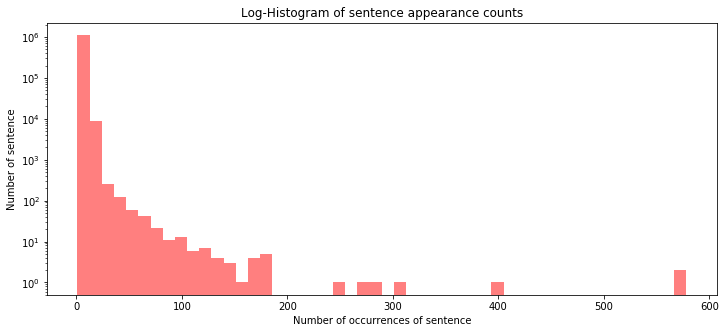

In [13]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of sentence appearance counts')
# 그래프 x 축 라벨
plt.xlabel('Number of occurrences of sentence')
# 그래프 y 축 라벨
plt.ylabel('Number of sentence')

In [14]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 578
중복 최소 개수: 1
중복 평균 개수: 1.69
중복 표준편차: 2.23
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 3.0


In [ ]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)

In [ ]:
train_length = train_set.apply(len)

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Normalised histogram of character count in sentence", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [ ]:
print('문장 길이 최대 값: {}'.format(np.max(train_length)))
print('문장 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('문장 길이 중간 값: {}'.format(np.median(train_length)))
print('문장 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('문장 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

In [ ]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length,
             labels=['char counts'],
             showmeans=True)

In [ ]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Normalised histogram of word count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

In [ ]:
print('문장 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('문장 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('문장 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('문장 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('문장 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('문장 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('문장 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

In [ ]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)

In [ ]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개

In [ ]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 문장: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 문장: {:.2f}%'.format(math * 100))
print('마침표를 포함한 문장: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 문장: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 문장: {:.2f}%'.format(capitals * 100))
print('숫자가있는 문장: {:.2f}%'.format(numbers * 100))

In [16]:
tokenizer_uncased = BertTokenizer.from_pretrained("bert-base-multilingual-uncased", cache_dir='bert_ckpt', do_lower_case=True)
tokenizer_cased = BertTokenizer.from_pretrained("bert-base-multilingual-cased", cache_dir='bert_ckpt', do_lower_case=False)

I0629 15:36:36.147372 140122108950336 tokenization_utils.py:418] loading file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-multilingual-uncased-vocab.txt from cache at bert_ckpt/bb773818882b0524dc53a1b31a2cc95bc489f000e7e19773ba07846011a6c711.535306b226c42cebebbc0dabc83b92ab11260e9919e21e2ab0beb301f267b4c7
I0629 15:36:37.434548 140122108950336 tokenization_utils.py:418] loading file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-multilingual-cased-vocab.txt from cache at bert_ckpt/96435fa287fbf7e469185f1062386e05a075cadbf6838b74da22bf64b080bc32.99bcd55fc66f4f3360bc49ba472b940b8dcf223ea6a345deb969d607ca900729


## Tokenizer Uncased

In [18]:
tokenizer = tokenizer_uncased

In [19]:
train_bert_token_counts = train_set.apply(lambda x:len(tokenizer.tokenize(x)))

Text(0, 0.5, 'Prabability')

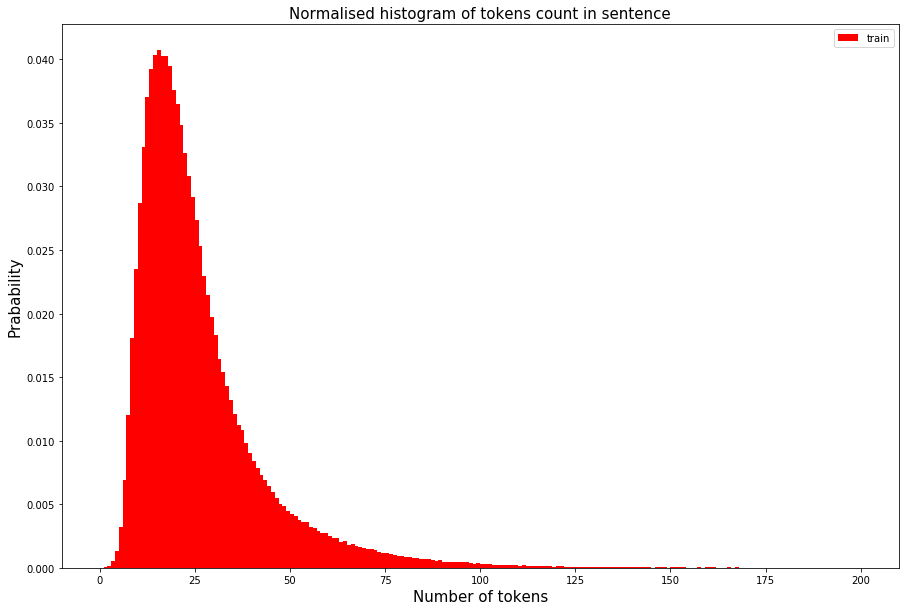

In [20]:
plt.figure(figsize=(15, 10))
plt.hist(train_bert_token_counts, bins=200, range=[0, 200], facecolor='r', density=True, label='train')
plt.title('Normalised histogram of tokens count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of tokens', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

In [21]:
print('문장 tokens 개수 최대 값: {}'.format(np.max(train_bert_token_counts)))
print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(train_bert_token_counts)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(train_bert_token_counts)))
print('문장 tokens 개수 중간 값: {}'.format(np.median(train_bert_token_counts)))
print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(train_bert_token_counts, 25)))
print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(train_bert_token_counts, 75)))
print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(train_bert_token_counts, 99)))

문장 tokens 개수 최대 값: 11326
문장 tokens 개수 평균 값: 26.03
문장 tokens 개수 표준편차: 33.86
문장 tokens 개수 중간 값: 21.0
문장 tokens 개수 제 1 사분위: 15.0
문장 tokens 개수 제 3 사분위: 31.0
문장 tokens 개수 99 퍼센트: 92.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f6f7fb3a320>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6f6b3c5c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6f7fb3a470>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6f6c7eaf60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6f7fbf8518>],
 'means': [<matplotlib.lines.Line2D at 0x7f6f7fbf8828>]}

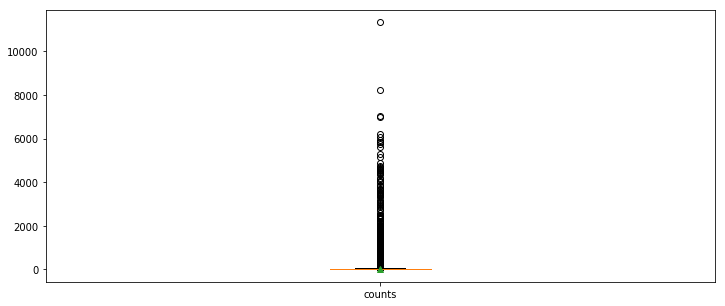

In [22]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_bert_token_counts,
             labels=['counts'],
             showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

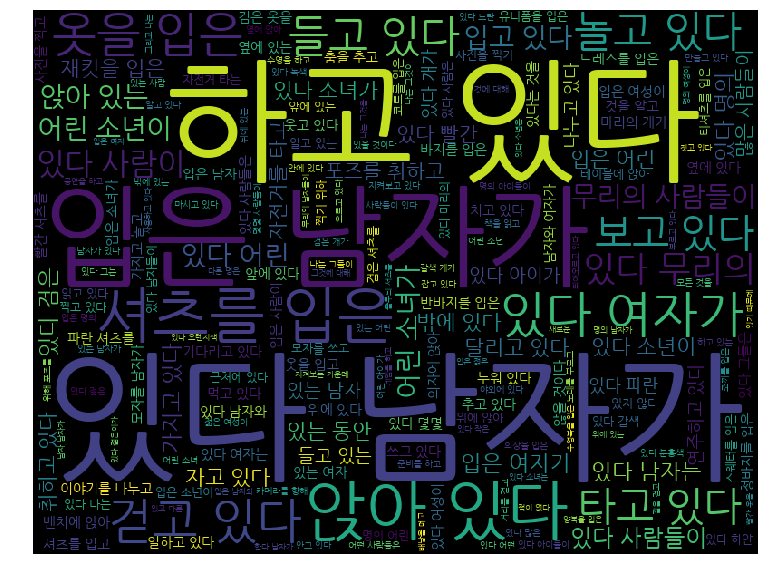

In [24]:
from wordcloud import WordCloud
cloud = WordCloud(font_path = DATA_IN_PATH + 'NanumGothic.ttf', width=800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

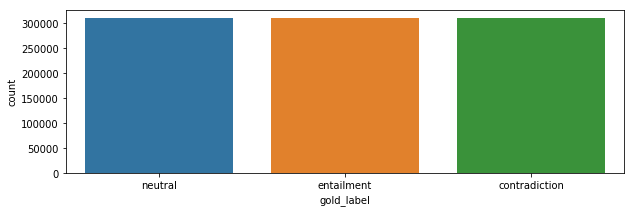

In [25]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(10, 3)
sns.countplot(train_data['gold_label'])

## Tokenizer cased

In [26]:
tokenizer = tokenizer_cased

In [27]:
train_bert_token_counts = train_set.apply(lambda x:len(tokenizer.tokenize(x)))

Text(0, 0.5, 'Prabability')

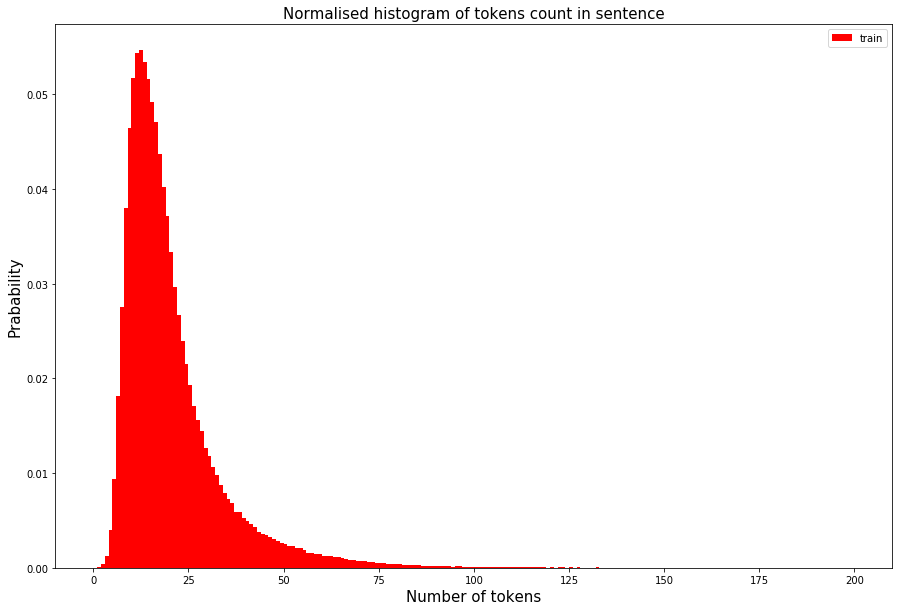

In [28]:
plt.figure(figsize=(15, 10))
plt.hist(train_bert_token_counts, bins=200, range=[0, 200], facecolor='r', density=True, label='train')
plt.title('Normalised histogram of tokens count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of tokens', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

In [29]:
print('문장 tokens 개수 최대 값: {}'.format(np.max(train_bert_token_counts)))
print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(train_bert_token_counts)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(train_bert_token_counts)))
print('문장 tokens 개수 중간 값: {}'.format(np.median(train_bert_token_counts)))
print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(train_bert_token_counts, 25)))
print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(train_bert_token_counts, 75)))
print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(train_bert_token_counts, 99)))

문장 tokens 개수 최대 값: 9006
문장 tokens 개수 평균 값: 20.24
문장 tokens 개수 표준편차: 26.77
문장 tokens 개수 중간 값: 16.0
문장 tokens 개수 제 1 사분위: 11.0
문장 tokens 개수 제 3 사분위: 24.0
문장 tokens 개수 99 퍼센트: 72.0
